In [2]:
%matplotlib nbagg

import matplotlib
import scipy
from scipy import stats
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

In [8]:
df_ini = pd.read_csv('C:/Users/jlmat_000/Documents/Data_science/Kaggle_data/student-mat.csv')

In [9]:
df_ini.ix[(df_ini['G1']==20) & (df_ini['G3']==20),'G1'].count()

0

In [10]:
df_ini.shape

(395, 33)

In [11]:
print(df_ini.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [12]:
df_ini['evol']= df_ini['G3'] - df_ini['G1']
df_ini.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,evol
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,3
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,4


In [13]:
plt.figure()
plt.scatter(np.zeros(df_ini['absences'].size),df_ini['absences'])

<IPython.core.display.Javascript object>

In [14]:
df_ini['log_absences']= np.log(df_ini['absences']+1)
plt.figure()
plt.scatter(np.zeros(df_ini['log_absences'].size),df_ini['log_absences'])

<IPython.core.display.Javascript object>

In [15]:
plt.figure()
plt.scatter(df_ini['G1'],df_ini['evol'])
plt.xlabel(u'Notes période 1')
plt.ylabel(u"Ecart des notes")

<IPython.core.display.Javascript object>

In [16]:
df_ini[((df_ini['G3']==0)& ((df_ini['G1']>5) | (df_ini['G2']>5)))].count()

school          35
sex             35
age             35
address         35
famsize         35
Pstatus         35
Medu            35
Fedu            35
Mjob            35
Fjob            35
reason          35
guardian        35
traveltime      35
studytime       35
failures        35
schoolsup       35
famsup          35
paid            35
activities      35
nursery         35
higher          35
internet        35
romantic        35
famrel          35
freetime        35
goout           35
Dalc            35
Walc            35
health          35
absences        35
G1              35
G2              35
G3              35
evol            35
log_absences    35
dtype: int64

In [17]:
df = df_ini[(((df_ini['G3']==0)& ((df_ini['G1']>5) | (df_ini['G2']>5)))==False)]
df = df[['evol','G1','G2','G3','Medu','Fedu','studytime','famrel','goout','Walc','log_absences','age', 'failures']]
df['G3'].count()

360

In [18]:
df[['G1','G2','G3']].hist(normed=True, sharex=True, layout=(3,1))
plt.xlabel('Notes sur 20')

<IPython.core.display.Javascript object>

In [19]:
df[['evol']].hist(normed=True)
plt.xlabel("Ecart entre note initiale et note finale")
plt.title("Histogramme de l'écart de note entre G1 et G3")

<IPython.core.display.Javascript object>

In [20]:
scipy.stats.skew(df['evol'])

0.0362527049511319

In [21]:
df['evol'].describe()

count    360.000000
mean       0.213889
std        1.564340
min       -5.000000
25%       -1.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: evol, dtype: float64

<IPython.core.display.Javascript object>


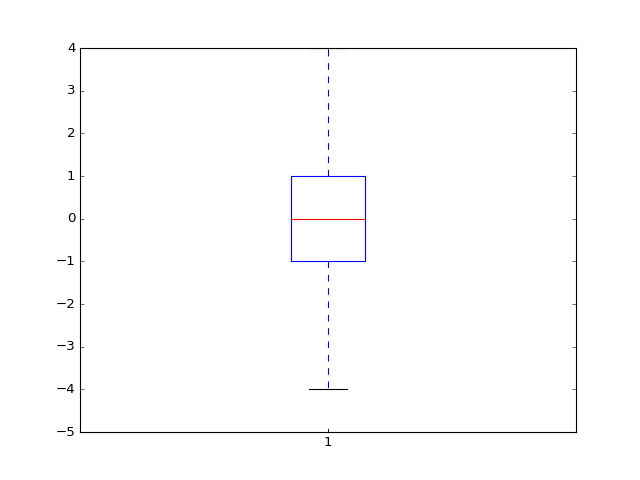

{'boxes': [<matplotlib.lines.Line2D at 0x9ba96b6c18>],
 'caps': [<matplotlib.lines.Line2D at 0x9ba96c0f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x9ba96cbef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x9ba96c4f98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x9ba96b6e48>,
  <matplotlib.lines.Line2D at 0x9ba96c0e10>]}

In [22]:
plt.figure()
plt.boxplot(df['evol'])

<IPython.core.display.Javascript object>


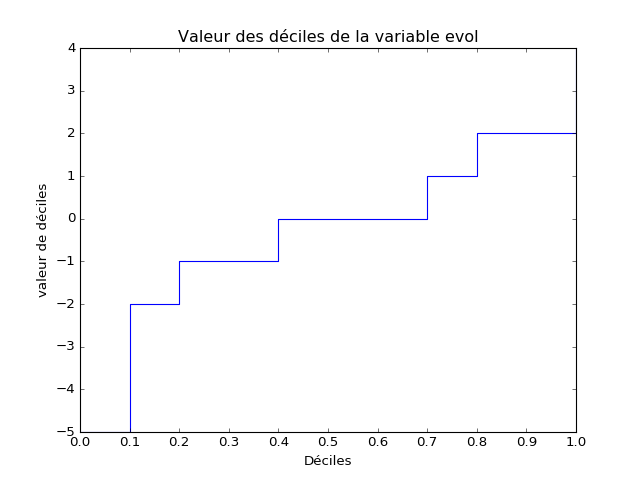

In [36]:
plt.figure()
#plt.plot([0,0.1,0.25,0.5,0.75,0.9,1],df['evol'].quantile([0,0.1,0.25,0.5,0.75,0.9,1]))
plt.plot(np.arange(0,1.1,0.1),df['evol'].quantile(np.arange(0,1.1,0.1)), drawstyle='steps-post')
plt.title('Valeur des déciles de la variable evol')
plt.xticks(np.arange(0,1.1,0.1))
plt.xlabel("Déciles")
plt.ylabel("valeur de déciles")

In [24]:
mini = df[["G1", "G2", "G3"]]
mini.describe()

,G1,G2,G3
count,360.000000,360.000000,360.000000
mean,11.213889,11.263889,11.427778
std,3.282659,3.300177,3.381138
min,3.000000,0.000000,0.000000
25%,9.000000,9.000000,9.000000
50%,11.000000,11.000000,11.000000
75%,14.000000,13.250000,14.000000
max,19.000000,19.000000,20.000000


<IPython.core.display.Javascript object>


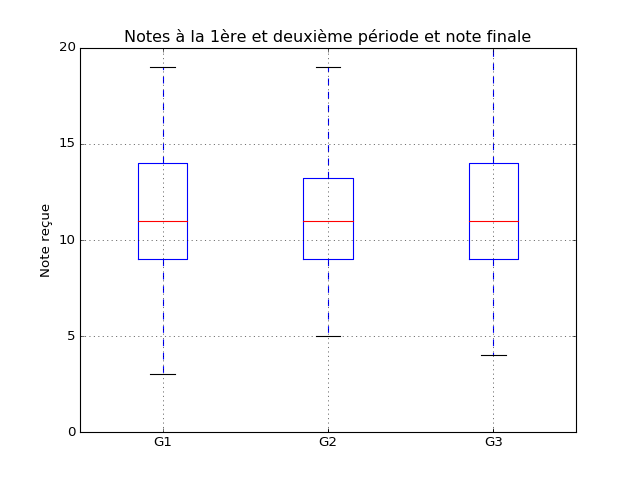

In [25]:
plt.figure()
df[["G1","G2","G3"]].boxplot()
plt.ylabel("Note reçue")
plt.title(u"Notes à la 1ère et deuxième période et note finale")

In [26]:
kurt=pd.DataFrame(scipy.stats.skew(mini),index = ['G1','G2','G3'], columns = ["Skewness"])
kurt["Kurtosis"]=scipy.stats.kurtosis(mini, fisher=True)
kurt

,Skewness,Kurtosis
G1,0.137932,-0.660242
G2,-0.090875,0.210885
G3,-0.066184,0.248949


In [27]:
scipy.stats.skew(df_ini[['G1','G2','G3']])

array([ 0.23969856, -0.4300045 , -0.72988711])

In [28]:
def fdr(t,obs):
    # t : vecteur de points ou on veut evaluer la fdr
    # obs : Series avec les observations
    y = pd.Series(np.arange(0.,len(t),1))
    for i in range(len(t)):
        y[i] = (obs<=t[i]).mean()
    return y 

In [29]:
def plot_fdr(obs,a,b):
    X = obs.unique()
    X =  X[(X>=a)&(X<=b)]
    X = np.append(X,[a,b])
    X = np.sort(X)
    fdr_val = fdr(X,obs)
#    courbe = plt.plot(X,fdr_val, drawstyle='steps-post')  
    courbe = plt.step(X,fdr_val,where='post')
    plt.axis([a,b,-.05,1.05])
    return courbe

<IPython.core.display.Javascript object>


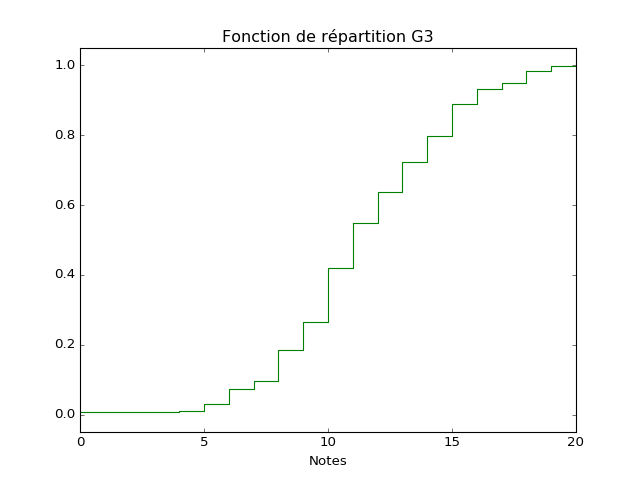

[None, None]

In [30]:
plt.figure()
plt.title('Fonction de répartition G3')
plt.xlabel('Notes')
fig_fdr = plot_fdr(df['G3'],0,20)
plt.setp(fig_fdr,color='g',linestyle='-')

<IPython.core.display.Javascript object>


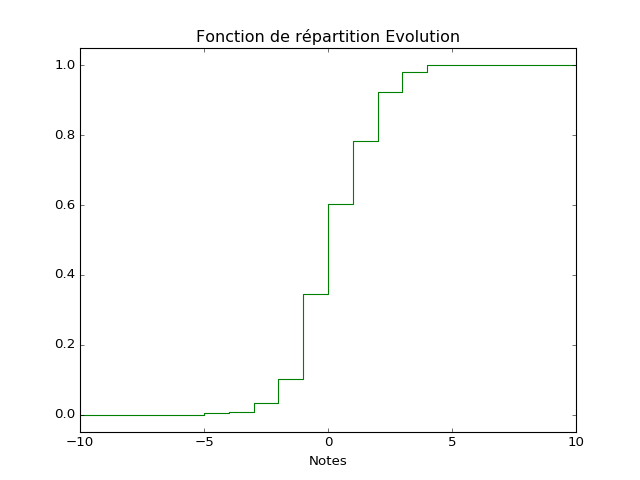

[None, None]

In [31]:
plt.figure()
plt.title('Fonction de répartition Evolution')
plt.xlabel('Notes')
fig_fdr = plot_fdr(df['evol'],-10,10)
plt.setp(fig_fdr,color='g',linestyle='-')

In [37]:
def scatter_matrix(tableau):
    # scatter plot matrix with all variables
    L = tableau.shape[1]
    plt.figure(figsize=(2*L,2*L))

    i = 0
    for l in range(L):
        for k in range(L):
            i += 1
            h = plt.subplot(L,L,i)
            plt.scatter(tableau[tableau.columns[l]],tableau[tableau.columns[k]]) 
            for xlabel_i in h.axes.get_xticklabels():
                xlabel_i.set_visible(False)                
            for ylabel_i in h.axes.get_yticklabels():
                ylabel_i.set_visible(False)  
            if (l==L-1):
                plt.xlabel(tableau.columns[k])
            if (k==0):
                plt.ylabel(tableau.columns[l])

<IPython.core.display.Javascript object>


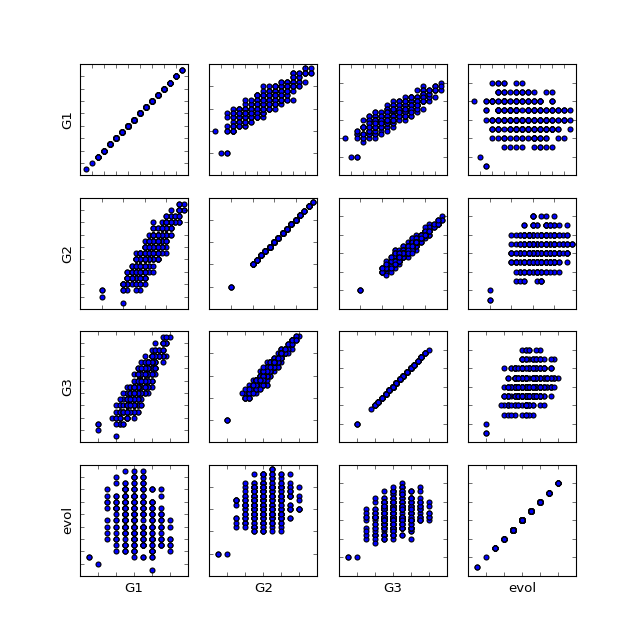

In [40]:
scatter_matrix(df[['G1','G2','G3','evol']])

In [41]:
df[['G1','G2','G3','evol']].corr()

,G1,G2,G3,evol
G1,1.000000,0.899337,0.890196,-0.174377
G2,0.899337,1.000000,0.968923,0.207017
G3,0.890196,0.968923,1.000000,0.293369
evol,-0.174377,0.207017,0.293369,1.000000


In [43]:
df.corr()

,evol,G1,G2,G3,Medu,Fedu,studytime,famrel,goout,Walc,log_absences,age,failures
evol,1.000000,-0.174377,0.207017,0.293369,0.038913,0.005410,0.003061,0.044747,-0.069886,-0.006623,-0.141098,-0.239700,-0.071889
G1,-0.174377,1.000000,0.899337,0.890196,0.171081,0.167058,0.158179,0.003081,-0.154370,-0.159948,-0.127211,-0.038034,-0.337620
G2,0.207017,0.899337,1.000000,0.968923,0.196261,0.183505,0.148634,-0.017231,-0.161154,-0.145265,-0.191150,-0.164747,-0.368458
G3,0.293369,0.890196,0.968923,1.000000,0.184102,0.164695,0.154988,0.023694,-0.182208,-0.158354,-0.188787,-0.147827,-0.361047
Medu,0.038913,0.171081,0.196261,0.184102,1.000000,0.608582,0.056580,-0.008913,0.073846,-0.049685,0.049493,-0.139002,-0.208096
Fedu,0.005410,0.167058,0.183505,0.164695,0.608582,1.000000,-0.023126,-0.014183,0.032822,-0.017559,-0.029563,-0.141591,-0.265814
studytime,0.003061,0.158179,0.148634,0.154988,0.056580,-0.023126,1.000000,0.047252,-0.052652,-0.237266,-0.047882,-0.005087,-0.158765
famrel,0.044747,0.003081,-0.017231,0.023694,-0.008913,-0.014183,0.047252,1.000000,0.036154,-0.127123,-0.135509,0.066825,0.006148
goout,-0.069886,-0.154370,-0.161154,-0.182208,0.073846,0.032822,-0.052652,0.036154,1.000000,0.439367,0.153063,0.133517,0.141704
Walc,-0.006623,-0.159948,-0.145265,-0.158354,-0.049685,-0.017559,-0.237266,-0.127123,0.439367,1.000000,0.195087,0.115873,0.144101


In [44]:
data = pd.DataFrame(df[['G1','G2','G3','Medu','Fedu','studytime','goout','age','Walc','failures']])
data_std = (data - data.mean())/data.std()
print(data_std.mean())
class_g3= pd.Series([])
k=0
for f in data['G3']:
    if f >= data['G3'].quantile(0.75):
        class_g3[k]= 'Elevee'
    elif f < data['G3'].quantile(0.25):
        class_g3[k]= 'Basse'
    else:
        class_g3[k]= 'Moyenne'
    k += 1
data['G3_class']= class_g3
data.shape


G1           1.221245e-16
G2          -1.538892e-16
G3           1.995317e-16
Medu         2.146431e-16
Fedu         1.511137e-16
studytime    6.537980e-17
goout       -7.478586e-17
age          1.765255e-15
Walc        -2.442491e-16
failures    -6.075387e-17
dtype: float64


(360, 11)

In [45]:
from sklearn.decomposition import PCA

C:\Users\jlmat_000\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


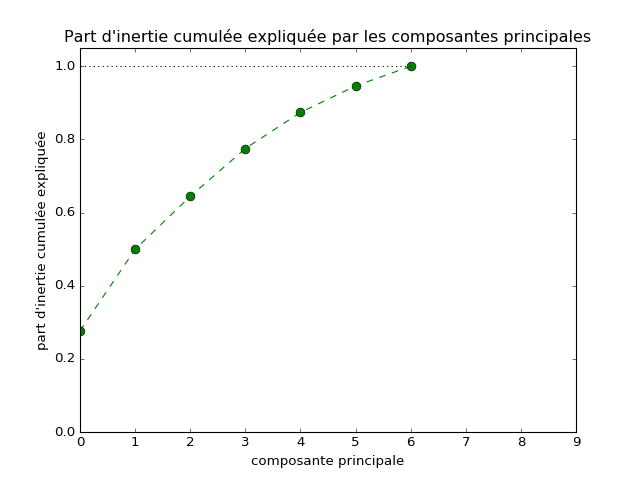

In [71]:
grade_pca = PCA()
grade_res = grade_pca.fit_transform(data_std.drop(['G1','G2','G3'],1))
scree = pd.Series(grade_pca.explained_variance_ratio_)
plt.figure()
cum = scree.cumsum()
plt.plot(cum,'o--', markersize = 8, color ='green')
plt.plot(np.ones(cum.size),':', color='k')
plt.axis([0,9,0,1.05])
plt.title("Part d'inertie cumulée expliquée par les composantes principales")
plt.xlabel("composante principale")
plt.ylabel("part d'inertie cumulée expliquée")
plt.show()

In [49]:
def myPCA(df):
	# Normalize data
	df_norm = (df - df.mean()) / df.std()
	# PCA
	pca = PCA()
	pca_res = pca.fit_transform(df_norm.values)
	# Ebouli
	ebouli = pd.Series(pca.explained_variance_ratio_)
	coef = np.transpose(pca.components_)
	cols = ['PC-'+str(x) for x in range(len(ebouli))]
	pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
	return pc_infos, ebouli  

def circleOfCorrelations(pc_infos, ebouli):
	plt.Circle((0,0),radius=10, color='g', fill=False)
	circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
	fig = plt.gcf()
	fig.gca().add_artist(circle1)
	for idx in range(len(pc_infos["PC-0"])):
		x = pc_infos["PC-0"][idx]
		y = pc_infos["PC-1"][idx]
		plt.plot([0.0,x],[0.0,y],'k-')
		plt.plot(x, y, 'rx')
		plt.annotate(pc_infos.index[idx], xy=(x,y))
	plt.xlabel("PC-1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
	plt.ylabel("PC-2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
	plt.xlim((-1,1))
	plt.ylim((-1,1))
	plt.title("Circle of Correlations")
    
def circleOfCorrelationsCP3(pc_infos, ebouli):
	plt.Circle((0,0),radius=10, color='g', fill=False)
	circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
	fig = plt.gcf()
	fig.gca().add_artist(circle1)
	for idx in range(len(pc_infos["PC-0"])):
		x = pc_infos["PC-0"][idx]
		y = pc_infos["PC-2"][idx]
		plt.plot([0.0,x],[0.0,y],'k-')
		plt.plot(x, y, 'rx')
		plt.annotate(pc_infos.index[idx], xy=(x,y))
	plt.xlabel("PC-1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
	plt.ylabel("PC-3 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
	plt.xlim((-1,1))
	plt.ylim((-1,1))
	plt.title("Circle of CorrelationsCP3")

C:\Users\jlmat_000\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


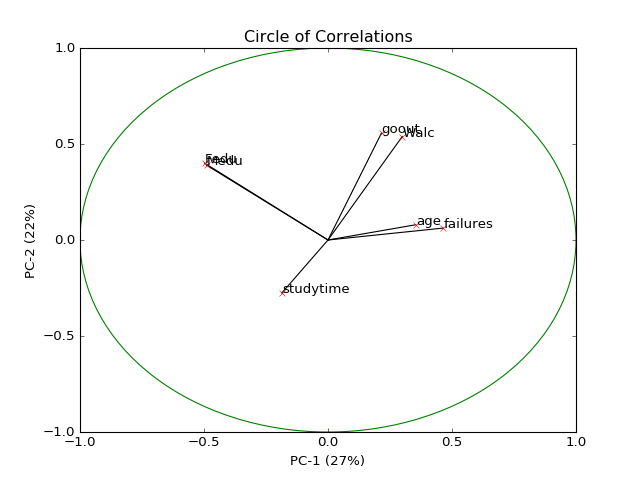

In [72]:
plt.figure()
pc_infos, ebouli = myPCA(data_std.drop(['G1','G2','G3'],1))
circleOfCorrelations(pc_infos, ebouli)

In [75]:
grade_pca = PCA()
grade_res = grade_pca.fit_transform(data_std.drop(['G1','G2','G3', 'studytime','age'],1))

C:\Users\jlmat_000\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


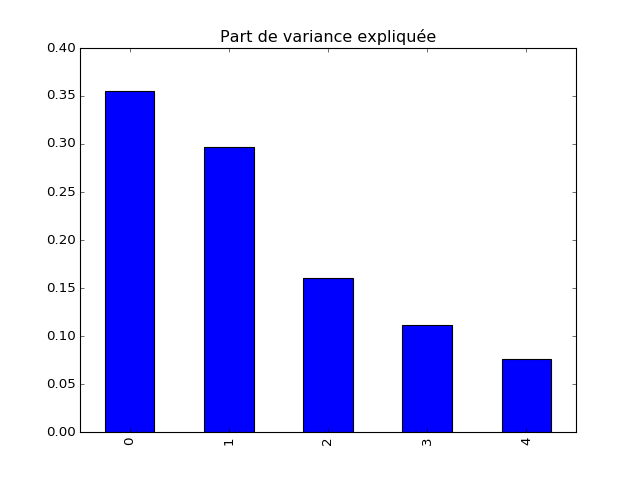

In [76]:
plt.figure()
scree = pd.Series(grade_pca.explained_variance_ratio_)
scree.plot(kind='bar', title=u'Part de variance expliquée')

C:\Users\jlmat_000\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


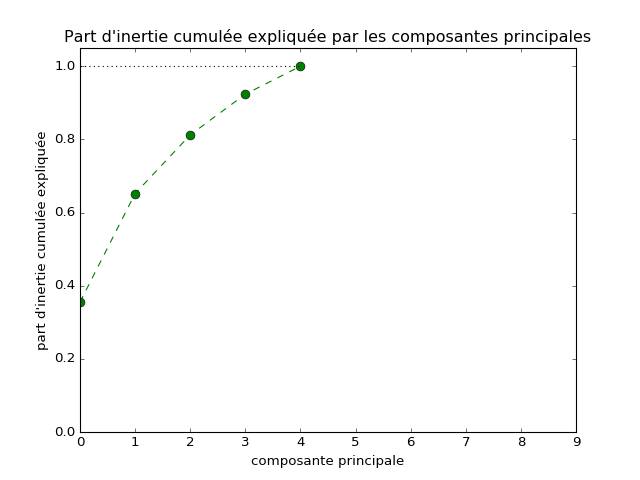

In [77]:
plt.figure()
cum = scree.cumsum()
plt.plot(cum,'o--', markersize = 8, color ='green')
plt.plot(np.ones(cum.size),':', color='k')
plt.axis([0,9,0,1.05])
plt.title("Part d'inertie cumulée expliquée par les composantes principales")
plt.xlabel("composante principale")
plt.ylabel("part d'inertie cumulée expliquée")
plt.show()

C:\Users\jlmat_000\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


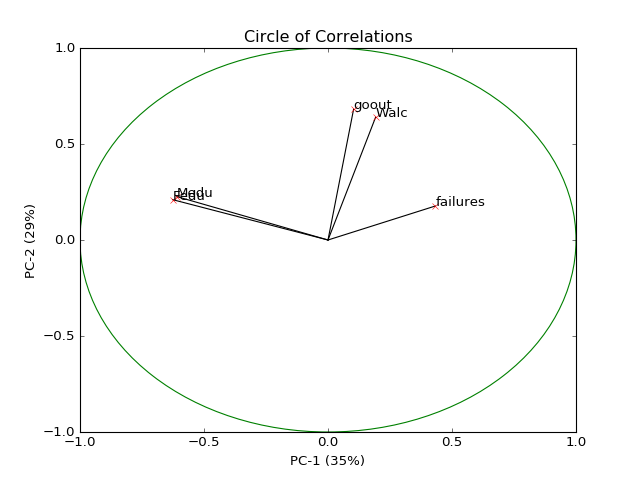

In [73]:
plt.figure()
pc_infos, ebouli = myPCA(data_std.drop(['G1','G2','G3','studytime','age'],1))
circleOfCorrelations(pc_infos, ebouli)

C:\Users\jlmat_000\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


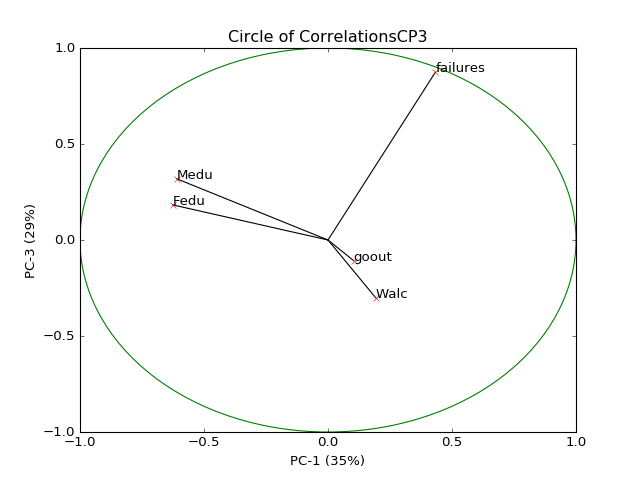

In [78]:
plt.figure()
pc_infos, ebouli = myPCA(data_std.drop(['G1','G2','G3','studytime','age'],1))
circleOfCorrelationsCP3(pc_infos, ebouli)

<IPython.core.display.Javascript object>


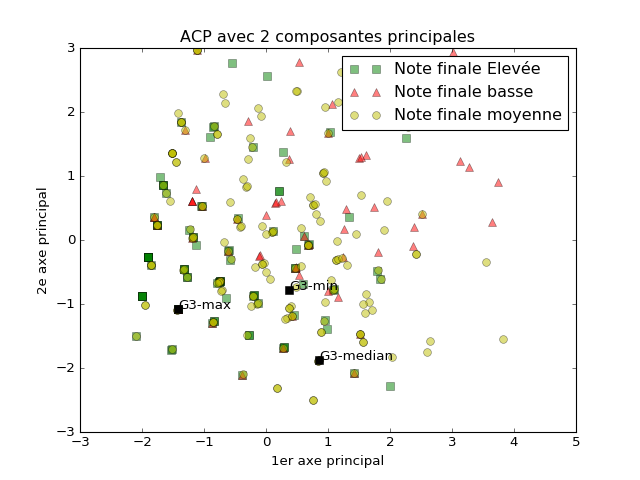

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(grade_res[data[data['G3_class']=='Elevee'].index,0],grade_res[data[data['G3_class']=='Elevee'].index,1], 'gs', markersize=7, label=u'Note finale Elevée', alpha=0.5)
plt.plot(grade_res[data[data['G3_class']=='Basse'].index,0],grade_res[data[data['G3_class']=='Basse'].index,1], 'r^', markersize=7, label='Note finale basse', alpha=0.5)
plt.plot(grade_res[data[data['G3_class']=='Moyenne'].index,0],grade_res[data[data['G3_class']=='Moyenne'].index,1], 'yo', markersize=7, label='Note finale moyenne', alpha=0.5)
plt.xlabel('1er axe principal')
plt.ylabel('2e axe principal')
plt.legend()
plt.title('ACP avec 2 composantes principales')
ind = data.index.get_loc(data['G3'].argmax())
plt.plot(grade_res[ind,0],grade_res[ind,1],'s', markersize=7,color='black')
ax.text(grade_res[ind,0],grade_res[ind,1], 'G3-max')
ind = data.index.get_loc(data['G3'].argmin())
plt.plot(grade_res[ind,0],grade_res[ind,1],'s', markersize=7,color='black')
ax.text(grade_res[ind,0],grade_res[ind,1], 'G3-min')
ind = data.index.get_loc(data['G3'].median())
plt.plot(grade_res[ind,0],grade_res[ind,1],'s', markersize=7,color='black')
ax.text(grade_res[ind,0],grade_res[ind,1], 'G3-median')


<IPython.core.display.Javascript object>


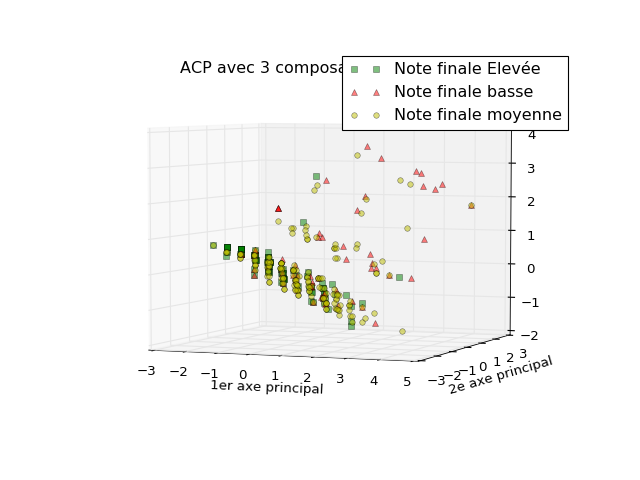

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(grade_res[data[data['G3_class']=='Elevee'].index,0],grade_res[data[data['G3_class']=='Elevee'].index,1],grade_res[data[data['G3_class']=='Elevee'].index,2], 'gs', markersize=5, label=u'Note finale Elevée', alpha=0.5)
plt.plot(grade_res[data[data['G3_class']=='Basse'].index,0],grade_res[data[data['G3_class']=='Basse'].index,1],grade_res[data[data['G3_class']=='Basse'].index,2], 'r^', markersize=5, label='Note finale basse', alpha=0.5)
plt.plot(grade_res[data[data['G3_class']=='Moyenne'].index,0],grade_res[data[data['G3_class']=='Moyenne'].index,1],grade_res[data[data['G3_class']=='Moyenne'].index,2], 'yo', markersize=5, label='Note finale moyenne', alpha=0.5)
plt.xlabel('1er axe principal')
plt.ylabel('2e axe principal')
plt.legend()
plt.title('ACP avec 3 composantes principales')

